### Mall Customers Segmentation :Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern, spending pattern, shopping score, salary etc are some of the factors that can be used to divide the customers into different categories.The reason for these clusters is to help identify those customers who would be interested in certain products, offers and services. The store may strategize its offerings in such a way that it targets only right customers for specific products. This helps in creating a win-win situation for both the store (in terms of revenue and more customers through customer recommendation) and the customer (discounts, offers, reward points, gifts, etc).

In [1]:
# general imports
import numpy as np                 ## for array operations
import pandas as pd                ## for series and dataframe operations
import matplotlib.pyplot as plt    ## for visualizations
import seaborn as sb               ## for visualizations
import math                        ## for mathematical operations
import statistics as st                ## for statistical operations
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from numpy.random import default_rng
from collections import Counter
import sklearn
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,LeaveOneOut,KFold,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV,cross_val_score,cross_val_predict,cross_validate
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from numpy.random import default_rng
from matplotlib.colors import ListedColormap 
from sklearn.datasets import load_iris
from sklearn import tree 
from matplotlib.colors import ListedColormap 
plt.rc("font", size=14)
sb.set(style="white") #white background style for seaborn plots
sb.set(style="whitegrid", color_codes=True)
# enable inline plots in the notebook
%matplotlib inline
from numpy import mean
from numpy import std
from ipywidgets import interactive
from sklearn.metrics import silhouette_samples, silhouette_score 
import matplotlib.cm as cm

In [2]:
## import the data

In [3]:
df=pd.read_csv("DS3_C6_S3_MallCustomers_Data_Project.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
### get the information about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
## describe the data

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


- There are total 200 records and 5 columns in the data.
- The data contains customers with age range from 18 to 70.
- The range of annual income is from 15 to 137.
- Spending score is between 1 to 100.

In [8]:
## check for null values in the data

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- There are no null or missing values in the data.

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

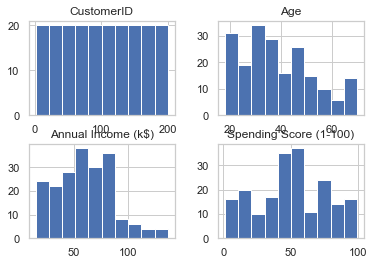

In [11]:
df.hist()

In [14]:
## visualizations

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

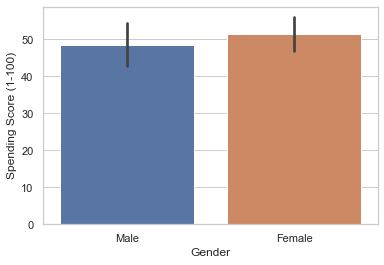

In [15]:
sb.barplot(data=df,x="Gender",y="Spending Score (1-100)")

<AxesSubplot:xlabel='Spending Score (1-100)'>

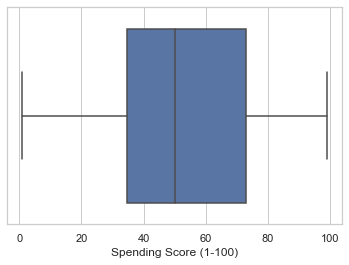

In [16]:
sb.boxplot(data=df,x="Spending Score (1-100)")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

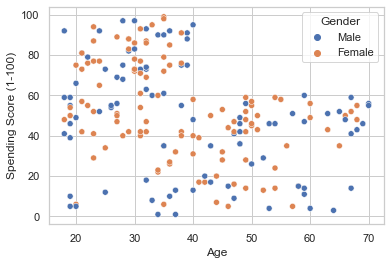

In [17]:
sb.scatterplot(data=df,x="Age",y="Spending Score (1-100)",hue="Gender")

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

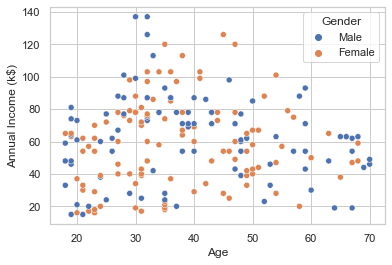

In [18]:
sb.scatterplot(data=df,x="Age",y="Annual Income (k$)",hue="Gender")

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

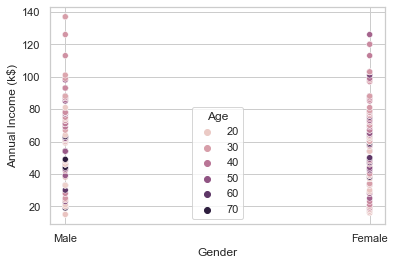

In [19]:
sb.scatterplot(data=df,x="Gender",y="Annual Income (k$)",hue="Age")

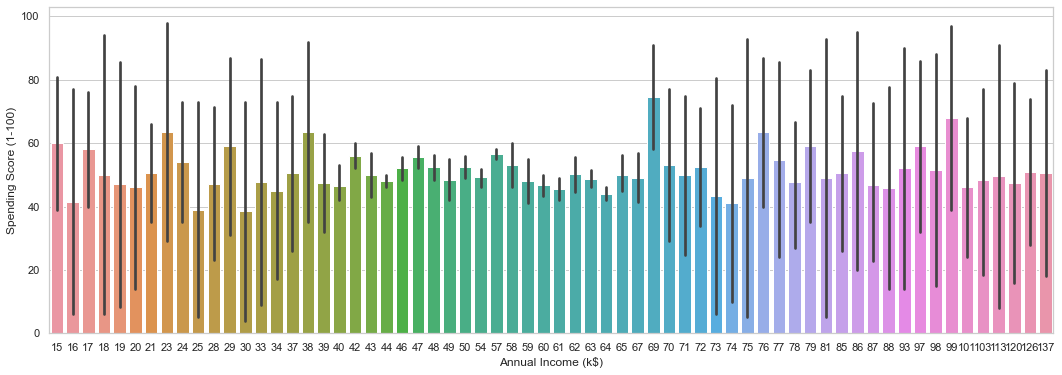

In [20]:
plt.figure(figsize=(18,6))
sb.barplot(data=df,y="Spending Score (1-100)",x="Annual Income (k$)")
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

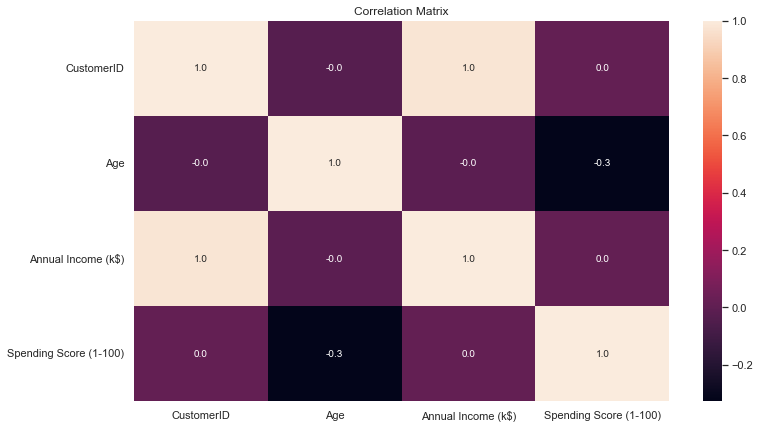

In [22]:
corr=df.corr()
plt.figure(figsize=(12,7))
heat_map = sb.heatmap(corr,annot=True,fmt='.1f',cbar=True)  ## finding the correlation between features
heat_map.set(title = "Correlation Matrix")
plt.show()

### Building model on best k-value.

In [23]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [35]:
wcss=[]  # WE HAVE TO USE FIRST RANDOM K VALUES
for k in range(2,15):  # k is always greater or equal to 2 and less than N_samples - 1
    kmeans=KMeans(n_clusters=k).fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
    x=kmeans.inertia_
    wcss.append(x)
wcss  # for k in range(2,14)

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30552.71402546729,
 25018.576334776335,
 21794.8856090982,
 19636.753964898155,
 17849.609174804526,
 16049.714149902386,
 14377.08694083694,
 12789.038068355792]

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),wcss,mfc="r",marker="s")
plt.grid(True) 
plt.xlabel('K-clusters')
plt.ylabel('wcss')
plt.title('Elbow curve')

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395
For n_clusters = 8 The average silhouette_score is : 0.4572211842776841
For n_clusters = 9 The average silhouette_score is : 0.45872989167156364
For n_clusters = 10 The average silhouette_score is : 0.4467356774401869
For n_clusters = 11 The average silhouette_score is : 0.42983405632843386
For n_clusters = 12 The average silhouette_score is : 0.4267928147986293
For n_clusters = 13 The average silhouette_score is : 0.4268770594148023
For n_clusters = 14 The average silhouette_score is : 0.43623474793328404


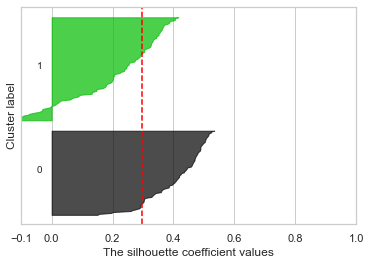

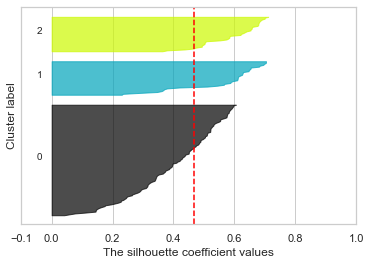

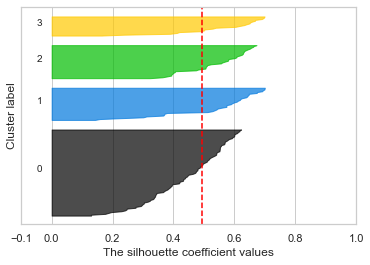

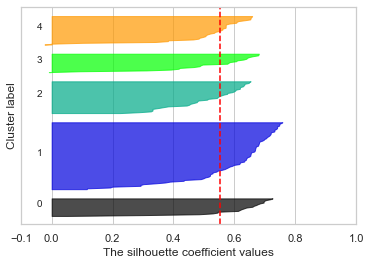

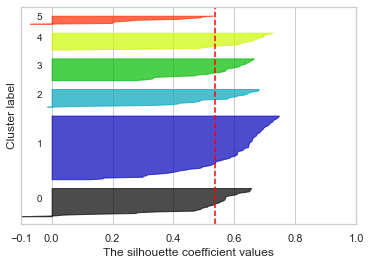

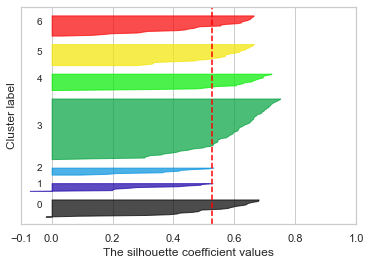

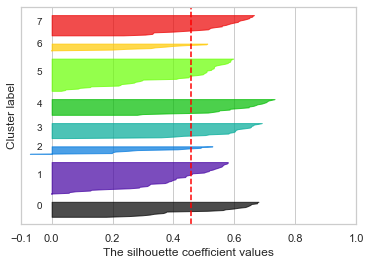

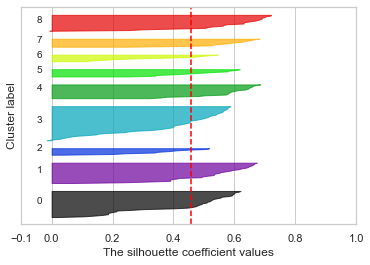

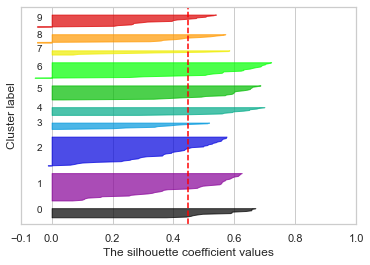

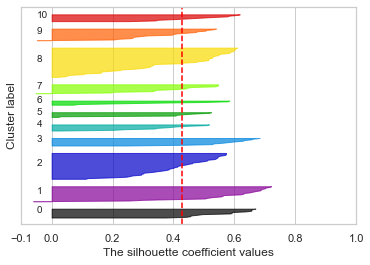

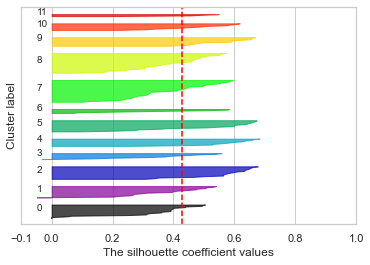

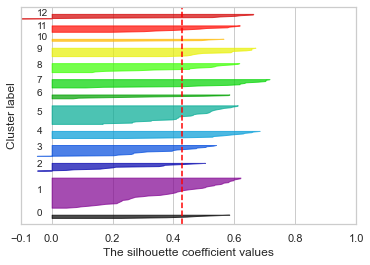

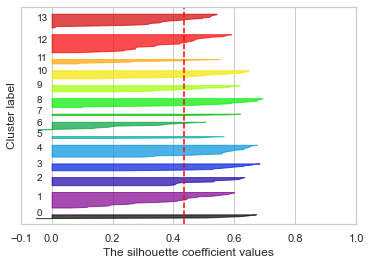

In [36]:
for n_clusters in range(2,15):
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df[['Annual Income (k$)',
       'Spending Score (1-100)']]) + (n_clusters + 1) * 10])

    m1 = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = m1.fit_predict(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
    silhouette_avg = silhouette_score(df[['Annual Income (k$)',
       'Spending Score (1-100)']], cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df[['Annual Income (k$)',
       'Spending Score (1-100)']], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

- Also from silhotte score, we can see max score is getting for the N_clusters=5. 

In [40]:
x = df.iloc[:, [3,4]].values 

In [41]:
m1 = KMeans(n_clusters=5).fit(x)  ## building a model and fitting the data  to the model

In [42]:
centroids = m1.cluster_centers_    # centroid of each cluster (centroid meaning full row or data point)
centroids

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

In [43]:
y_predict=m1.predict(x)       ## precting all rows (or) data points in any of the six clusters
y_predict

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [45]:
df["y_predict"]=y_predict

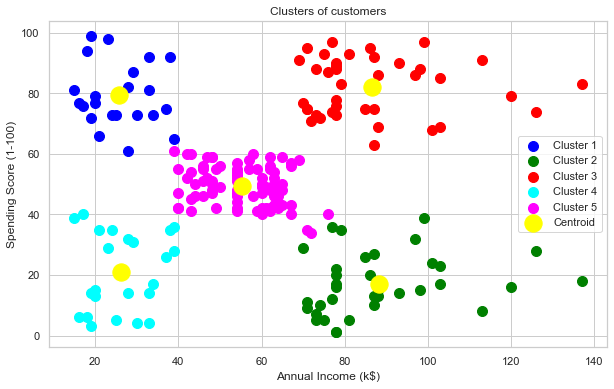

In [46]:
#visulaizing the clusters  
plt.figure(figsize=(10,6))
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0],  x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  

plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

In [47]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),y_predict
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [72]:
new_df=df[(df.y_predict== 1)| (df.y_predict== 3)]
new_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),y_predict
0,1,Male,19,15,39,3
2,3,Female,20,16,6,3
4,5,Female,31,17,40,3
6,7,Female,35,18,6,3
8,9,Male,64,19,3,3
10,11,Male,67,19,14,3
12,13,Female,58,20,15,3
14,15,Male,37,20,13,3
16,17,Female,35,21,35,3
18,19,Male,52,23,29,3


#### Conclusion: These are the customers to whom we should target and offer the discounts and services as they are having  moderate to high level income but comparatievly spending score is less.